## The yellow pages will be web scraped for hotels in the Austin Tx area. 
---
The following libraries will be used 

In [1]:
import requests as r
import csv
from bs4 import BeautifulSoup
import re 
import pandas as pd

Creating a location to place the CSV file once complete.

In [2]:
# file path
fp = '/content/gdrive'
filename = 'hotels.csv'

The following is the site where the web scrape will begin

In [3]:
site = 'https://www.yellowpages.com/search?search_terms=hotel&geo_location_terms=Austin%2C+TX'

Beautiful Soup and requests retrieving the page

In [4]:
result = r.get(site)

In [5]:
soup = BeautifulSoup(result.content, 'lxml')

In [6]:
r.get('https://www.yellowpages.com/search?search_terms=hotel&geo_location_terms=Austin%2C%20TX&page=1')

<Response [200]>

Austin has many pages of hotels on Yellow pages. The following will retrieve a 
list of links (pagination)

In [7]:
links = []
i=0
for i in range(5):
  links.append(site + '&page=' + str(i+1))




The following block of code will retrieve the hotel name, the address, and the hotel phone number. The data will be appended into empty lists. 

In [8]:
hotel_name=[]
phone = []
address=[]
city = []
for link in links:
  result = r.get(link)
  soup = BeautifulSoup(result.content,'lxml')
  soup.find_all('a', attrs = {'class': 'business-name'})
  for hotel in soup.find_all('h2'):
    hotel_name.append(hotel.text)
  for num in soup.find_all('div', attrs={'class': 'phones phone primary'}):
    phone.append(num.text)
  for addy in soup.find_all('div', attrs={'class': 'street-address'}):
    address.append(addy.text)
  for city in soup.find_all('div', attrs={'class': 'locality'}):
    city.append(city.text)

As you can see the web scrape returned hotels advertised on the page. These hotels do not have addresses or phone numbers associated with them. This will be a problem. 

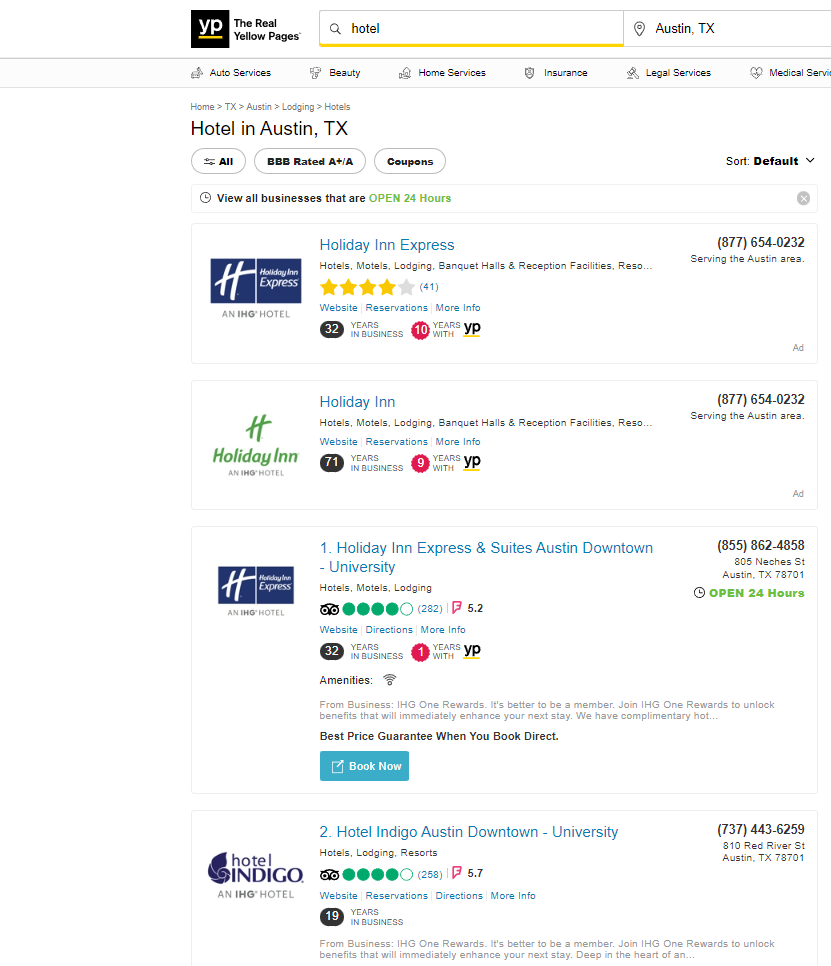

In [9]:
hotel_name[:10]

['1. Holiday Inn Express & Suites Austin Downtown - University',
 '2. Hotel Indigo Austin Downtown - University',
 '3. Holiday Inn Austin-Town Lake',
 '4. Holiday Inn Austin Midtown',
 '5. Holiday Inn Austin Airport',
 '6. Candlewood Suites Austin Airport',
 '7. Holiday Inn Express & Suites Austin Airport',
 '8. Holiday Inn Express & Suites Austin South',
 '9. Staybridge Suites Austin South Interstate Hwy 35',
 '10. Candlewood Suites Austin North 290 & I-35']

However, the hotels that we would like to web scrape have a similarity amongst eachother... They all begin with numbers because they are ranked. This will be used to remove the hotels that are advertised and lack addresses and phone numbers. The following list 's' contains numbers, however the numbers that are part of our 'hotel_name' list are strings. Nonetheless, our list 's' of numbers will be converted into a list of strings and the name will be changed to 's_strings'.

In [10]:
s = [1,2,3,4,5,6,7,8,9,0]
s_strings = [str(x)for x in s]

Now, we will go through the 'hotel_name' list pulling each hotel and checking the first letter. If the first letter happens to be a number character then it will be removed from the 'hotel_name' list. 

In [20]:
for hotel in hotel_name:
  if hotel[0] not in s_strings:
    hotel_name.remove(hotel)

Now, comparing our first 10 items in 'hotel_name' list we see that the hotels without leading numbers have been removed. 

In [12]:
hotel_name[:10]

['1. Holiday Inn Express & Suites Austin Downtown - University',
 '2. Hotel Indigo Austin Downtown - University',
 '3. Holiday Inn Austin-Town Lake',
 '4. Holiday Inn Austin Midtown',
 '5. Holiday Inn Austin Airport',
 '6. Candlewood Suites Austin Airport',
 '7. Holiday Inn Express & Suites Austin Airport',
 '8. Holiday Inn Express & Suites Austin South',
 '9. Staybridge Suites Austin South Interstate Hwy 35',
 '10. Candlewood Suites Austin North 290 & I-35']

We can see from the following code that all three variables are of the same length. 

In [25]:
print(len(address))
print(len(hotel_name))
print(len(phone))

150
150
150


Now the final bit of cleaning that will be done is to remove the numbers from the 'hotel_name' list. As we can see again each number has a '.' at the end followed by a space. Therefore we can strip the names following this distinct similarity that all the hotel names have. 

In [22]:
hotel_name = [i.split('.')[1].strip() for i in hotel_name]



Finally, print out the file into a csv


In [23]:
columns = ['hotel_name', 'address', 'city', 'phone']
hotels = pd.DataFrame(list(zip(hotel_name, address, city, phone)), columns=columns)

In [27]:
rows = zip(hotel_name, address, city, phone)

with open(fp + filename, 'w', newline='') as dataout:
  datawriter = csv.writer(dataout, delimiter =',', quotechar='"', quoting= csv.QUOTE_NONNUMERIC)
  datawriter.writerow(['hotel_name', 'address', 'city', 'phone_number'])
  for row in rows:
        datawriter.writerow(row)

** Plan on adding latitude and longitude to the data and mapping the hotels.